# Optimization of a cantilever beam

Consider the following cantilever beam with a rectangular cross section $b\times h$, length $L$, and end load $P$

<p style="text-align:center;">
    <img src="./beam_1.jpg" alt="beam 1" title="A cantilever beam" width="350px" align="center"/>
</p>

The maximum bending stress is given by
$$
\sigma_\text{max} = \dfrac{6PL}{bh^2}
$$
The weight is given by
$$
W = \rho bhL
$$
The deflection at the tip is given by
$$
\delta_\text{tip} = \dfrac{4PL^3}{Ebh^2}
$$

where $\rho$ is the density, $E$ is the elastic modulus.



We wish to minimize weight $W$ and maximize the maximum bending stress $\sigma_{max}$ simultaneously resulting in the following optimization problem

\begin{equation*}
    \begin{aligned}
        & \underset{\mathbf{x}}{\text{minimize}}
        & & \mathbf{f} = 
        \begin{bmatrix}
            f_1(\mathbf{{x};{\mathbf{p}}}) = W({h};{b},{L},{\rho}) \\
            f_2(\mathbf{{x};{\mathbf{p}}}) = \sigma_\text{max}({h};{b},{L},{P})
        \end{bmatrix}
    \end{aligned}
\end{equation*}

We can visualize the trade-off between these two objects below

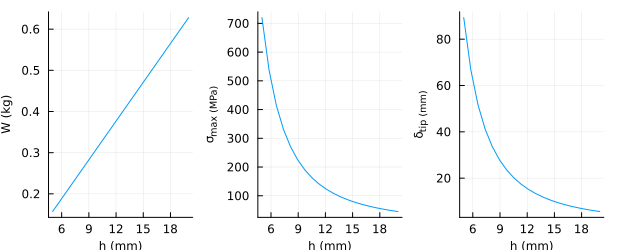

In [1]:
using Plots,LaTeXStrings

# Parameters
ρ = 7.85e-6 #kg/mm3
P = 300 # N
L = 200 # mm
b = 20 # mm
E = 215e3 # MPa

# independent parameter
h = LinRange(5,20,20) # mm

# dependant parameters
W(h) = ρ*b*h*L
σ_max(h) = (6*P*L) / (b*h^2)
δ_tip(h) = (4*P*L^3) / (E*b*h^2)

# Weight plot
p1 = plot(h, W, st=:line, label="W")
xlabel!("h (mm)", xguidefontsize=8)
ylabel!("W (kg)", yguidefontsize=8)

# sigma plot
p2 = plot(h, σ_max, st=:line, label="\\sigma_max")
xlabel!("h (mm)", xguidefontsize=8)
ylabel!("\\sigma_max (MPa)", yguidefontsize=8)

# deflection plot
p3 = plot(h, δ_tip, st=:line, label="\\delta_tip")
xlabel!("h (mm)", xguidefontsize=8)
ylabel!("\\delta_tip (mm)", yguidefontsize=8)

# combined plot
plot_vars = plot(p1, p2, p3, size = (620, 250), layout = grid(1, 3, widths=[0.33 ,0.33, 0.33]), legend=false)
# savefig(plot_vars,"independant_vars.pdf")

## Solving the problem

We can solve such a problem using a method known as $\varepsilon$-constraint method. We convert one of the objective as a constraint and perform a parametric study on the *constraint bound parameter*

\begin{equation*}
	\begin{aligned}
		& \underset{\mathbf{x}}{\text{minimize}}
		& & f_1(\mathbf{{x};{\mathbf{p}}}) = W({h};{b},{L},{\rho}) \\
		& \text{subject to}
		& & f_2(\mathbf{{x};{\mathbf{p}}}) = \sigma_\text{max}({h};{b},{L},{P}) \le {{\sigma_y}}\\
	\end{aligned}
\end{equation*}

We know that as h $\downarrow$, W $\downarrow$ while $\sigma_\text{max}$ $\uparrow$. This means that the optimum thickness $h^*$ is 

$$
h^* = \sqrt{\dfrac{6PL}{\sigma_y b}}
$$

and
$$
\sigma_{\text{max}}(h^*) = \sigma_y\\
$$
$$
W(h^*) = \dfrac{\sqrt{6}\rho L^{\frac{3}{2}} b^{\frac{1}{2}}P^{\frac{1}{2}}}{\sigma_y}
$$

These two curves represent the Pareto front.\
**A design $\mathbf{x}^*$ is Pareto-optimal if an objective cannot be improved without deteriorating another**.\
We can vary $P$ to perform a *parametric study*

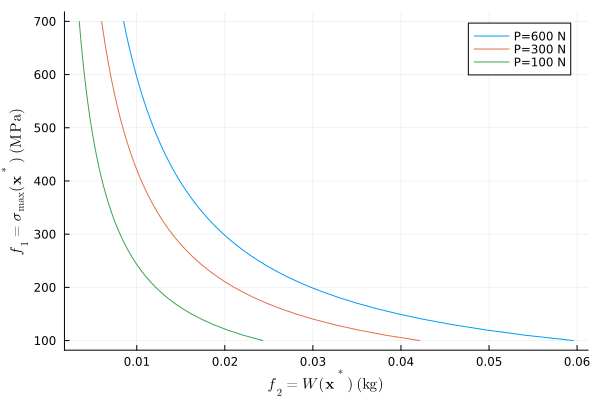

In [2]:
# constraint bound parameter
σ_y = 100:10:700

# Pareto front
P_1 = 600
σ_max_opt_1 = σ_y
W_opt_1 = sqrt(6)*ρ*sqrt(b)*sqrt(P_1)*L^(3/2) ./ σ_y

P_2 = 300
σ_max_opt_2 = σ_y
W_opt_2 = sqrt(6)*ρ*sqrt(b)*sqrt(P_2)*L^(3/2) ./ σ_y

P_3 = 100
σ_max_opt_3 = σ_y
W_opt_3 = sqrt(6)*ρ*sqrt(b)*sqrt(P_3)*L^(3/2) ./ σ_y

# Pareto plot
p1 = plot(W_opt_1, σ_max_opt_1, st=:line,   label="P=$P_1 N")
plot!(W_opt_2, σ_max_opt_2, st=:line,  label="P=$P_2 N")
plot!(W_opt_3, σ_max_opt_3, st=:line,  label="P=$P_3 N")
ylabel!(L"f_1 = \sigma_\mathrm{max}(\mathbf{x}^*)~\mathrm{(MPa)}", xguidefontsize=10)
xlabel!(L"f_2 = W(\mathbf{x}^*)~\mathrm{(kg)}", yguidefontsize=10)
# savefig(p1,"Pareto_front.pdf")

## 2 design variables (2D case)

Let us consider the case where we wish to vary both $b$ and $h$ simultaneously, i.e., they are both independent parameters. Notice that $b$ is no longer a parameter

\begin{equation*}
	\begin{aligned}
		& \underset{\mathbf{x}}{\text{minimize}}
		& & f_1(\mathbf{{x};{\mathbf{p}}}) = W({h},{b};{L},{\rho}) \\
		& \text{subject to}
		& & f_2(\mathbf{{x};{\mathbf{p}}}) = \sigma_\text{max}({h},{b};{L},{P}) \le {{\sigma_y}}\\
	\end{aligned}
\end{equation*}

The solution to this problem is:

$$
    h^*(\sigma_y) = \dfrac{\sigma_y^3}{6 L^3 P \rho^2} \left(\dfrac{18 L^5 P^2 \rho^3}{\sigma_y^5}\right)^{2/3}\\
    b^*(\sigma_y) = \dfrac{\sigma_y^3}{3 L^3 P \rho^2} \left(\dfrac{18 L^5 P^2 \rho^3}{\sigma_y^5}\right)^{2/3}\\
$$

Do not worry about how I obtained this solution (for now).\
We can obtain a Pareto front for this problem by finding all the optimizers in the range of $\sigma_y$


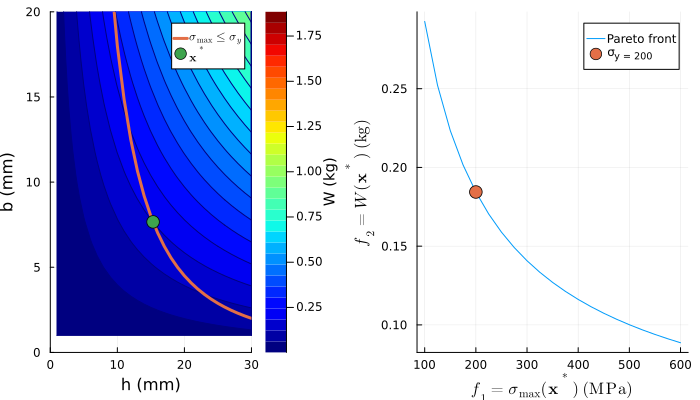

In [3]:
# independent parameters
h_2D = LinRange(1,30,30) # mm
b_2D = LinRange(1,40,30) # mm

# Parameters
ρ = 7.85e-6 #kg/mm3
P = 300 # N
L = 200 # mm

# constraint bound parameter
σ_y = 200 # MPa

# dependant variables
σ_max(h,b) = (6*P*L) / (b*h^2)
W(h,b) = ρ*b*h*L

# constraint function
b_cstr(h) = (6*P*L) / (σ_y*h^2)

# optimal variables
b_opt(σ_y) = (σ_y^3*((18*L^5*P^2*ρ^3)/σ_y^5)^(2/3))/(6*L^3*P*ρ^2)
h_opt(σ_y) = (σ_y^3*((18*L^5*P^2*ρ^3)/σ_y^5)^(2/3))/(3*L^3*P*ρ^2)
λ(σ_y) = ((18*L^5*P^2*ρ^3)/σ_y^5)^(1/3)

# Weight plot
p1 = contour(h_2D, b_2D, W, fill = true, levels = 30,  c = :jet1, colorbar_title="W (kg)")
plot!(h_2D, b_cstr, lw = 3, label=L"\sigma_{\mathrm{max}} \leq \sigma_{y}")
scatter!([h_opt(σ_y)], [b_opt(σ_y)], markersize = 7, label=L"\mathbf{x}^*")
xlabel!("h (mm)")
ylabel!("b (mm)")
ylims!((0,20))
xlims!((0,30))

# Pareto plot
σ_y_pareto = 100:25:600
p2 = plot(σ_max.(h_opt.(σ_y_pareto),b_opt.(σ_y_pareto)), W.(h_opt.(σ_y_pareto),b_opt.(σ_y_pareto)), st=:line, label="Pareto front")
scatter!([σ_max(h_opt(σ_y),b_opt(σ_y))], [W(h_opt(σ_y),b_opt(σ_y))], markersize = 7, label="\\sigma_y = $σ_y)")
xlabel!(L"f_1 = \sigma_\mathrm{max}(\mathbf{x}^*)~\mathrm{(MPa)}")
ylabel!(L"f_2 = W(\mathbf{x}^*)~\mathrm{(kg)}")

# combined plot
plot(p1, p2, size = (700, 400), layout = grid(1, 2, widths=[0.5 ,0.5]))